<a href="https://colab.research.google.com/github/Fasiloc/Machine_Learning_learn-repo/blob/main/Mini%20Project/Mini_Project_Indoor_Human_Occupation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#0 importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_graphviz
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score,roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from six import StringIO
from IPython.display import Image
import pydotplus
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def best_param(model,param_grid,x_train,y_train):
    grid=GridSearchCV(model,param_grid,n_jobs=-1)
    grid.fit(x_train,y_train)
    return grid.best_params_   

In [ ]:
#loading dataset
df=pd.read_csv('Occupancy_Estimation.csv')

In [ ]:
df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [ ]:
# droping un-neccessary column
df=df.drop(['Date','Time'],axis=1)

In [ ]:
df

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


Checking Null values

In [ ]:
df.shape

(10129, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S1_Temp               10129 non-null  float64
 1   S2_Temp               10129 non-null  float64
 2   S3_Temp               10129 non-null  float64
 3   S4_Temp               10129 non-null  float64
 4   S1_Light              10129 non-null  int64  
 5   S2_Light              10129 non-null  int64  
 6   S3_Light              10129 non-null  int64  
 7   S4_Light              10129 non-null  int64  
 8   S1_Sound              10129 non-null  float64
 9   S2_Sound              10129 non-null  float64
 10  S3_Sound              10129 non-null  float64
 11  S4_Sound              10129 non-null  float64
 12  S5_CO2                10129 non-null  int64  
 13  S5_CO2_Slope          10129 non-null  float64
 14  S6_PIR                10129 non-null  int64  
 15  S7_PIR             

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S1_Temp,10129.0,25.454012,0.351351,24.940000,25.190000,25.38,25.63,26.380000
S2_Temp,10129.0,25.546059,0.586325,24.750000,25.190000,25.38,25.63,29.000000
S3_Temp,10129.0,25.056621,0.427283,24.440000,24.690000,24.94,25.38,26.190000
S4_Temp,10129.0,25.754125,0.356434,24.940000,25.440000,25.75,26.00,26.560000
S1_Light,10129.0,25.445059,51.011264,0.000000,0.000000,0.00,12.00,165.000000
S2_Light,10129.0,26.016290,67.304170,0.000000,0.000000,0.00,14.00,258.000000
S3_Light,10129.0,34.248494,58.400744,0.000000,0.000000,0.00,50.00,280.000000
S4_Light,10129.0,13.220259,19.602219,0.000000,0.000000,0.00,22.00,74.000000
S1_Sound,10129.0,0.168178,0.316709,0.060000,0.070000,0.08,0.08,3.880000
S2_Sound,10129.0,0.120066,0.266503,0.040000,0.050000,0.05,0.06,3.440000


In [ ]:
df['Room_Occupancy_Count'].values

array([1, 1, 1, ..., 0, 0, 0])

Data Does not contain any outliers

In [ ]:
x = df.drop(['Room_Occupancy_Count'],axis=1)
y = df['Room_Occupancy_Count']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
sc = MinMaxScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

# Naive Bayers

In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(x_train_scaled,y_train)

MultinomialNB()

In [ ]:
y_pred_test = model.predict(x_test_scaled)
y_pred_train = model.predict(x_train_scaled)

In [ ]:
print("Test Accuracy : ",accuracy_score(y_test,y_pred_test))
print('Train Accuracy : ',accuracy_score(y_train,y_pred_train))

Test Accuracy :  0.8988153998025666
Train Accuracy :  0.908058743675182


Confusion Matrix :
 [[1613    3    1    2]
 [  70   28    4    1]
 [  28    0   95   41]
 [  10    1   44   85]]


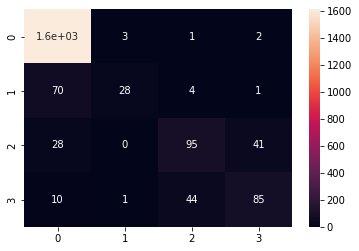

In [ ]:
cm = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix :\n',cm)
sns.heatmap(cm, annot=True)

# Decision Tree Classifier

In [ ]:
param_grid = {'criterion':['entropy','gini']}

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
print(best_param(model,param_grid,x_train_scaled,y_train))

{'criterion': 'entropy'}


In [ ]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=41)

In [ ]:
model.fit(x_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=41)

In [ ]:
y_pred_test = model.predict(x_test_scaled)
y_pred_train = model.predict(x_train_scaled)

In [ ]:
print("Test Accuracy : ",accuracy_score(y_test,y_pred_test))
print('Train Accuracy : ',accuracy_score(y_train,y_pred_train))

Test Accuracy :  0.9965449160908193
Train Accuracy :  0.9986424780945329


Confusion Matrix :
 [[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  162    1]
 [   2    0    3  135]]


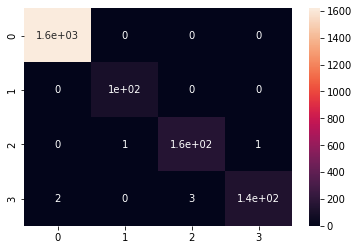

In [ ]:
cm = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix :\n',cm)
sns.heatmap(cm, annot=True)

# Linear Regression

Since classifier is used for regression problems, it is not used

# Logistic Regression

In [ ]:
model = LogisticRegression(random_state=41)
model.fit(x_train_scaled,y_train)

LogisticRegression(random_state=41)

In [ ]:
y_pred_test = model.predict(x_test_scaled)
y_pred_train = model.predict(x_train_scaled)

In [ ]:
print("Test Accuracy : ",accuracy_score(y_test,y_pred_test))
print('Train Accuracy : ',accuracy_score(y_train,y_pred_train))

Test Accuracy :  0.9846989141164857
Train Accuracy :  0.9886461804270024


Confusion Matrix :
 [[1616    0    0    3]
 [   0  103    0    0]
 [   0    0  148   16]
 [  11    0    1  128]]


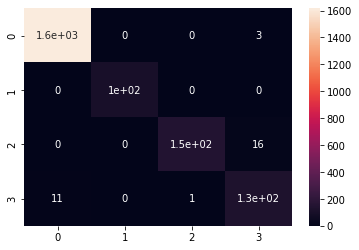

In [ ]:
cm = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix :\n',cm)
sns.heatmap(cm, annot=True)

# Artificial Neural Network

In [ ]:
param_grid = {'hidden_layer_sizes':[(100,80,60),(120,80,60),(150,100,80)],
             'activation':['tanh','relu'],
             'solver':['sgd','adam'],
             'max_iter':[150,100,50],
             'learning_rate':['constant','adaptive']}

In [ ]:
model = MLPClassifier()

In [ ]:
print(best_param(model,param_grid,x_train_scaled,y_train))

{'activation': 'tanh', 'hidden_layer_sizes': (120, 80, 60), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}


In [ ]:
model = MLPClassifier(hidden_layer_sizes=(120,80,60),
                      max_iter = 100,
                      activation = 'tanh',
                      verbose=True,
                      solver = 'adam',
                      learning_rate='adaptive')

In [ ]:
model = MLPClassifier()
model.fit(x_train_scaled,y_train)

MLPClassifier()

In [ ]:
y_pred_test = model.predict(x_test_scaled)
y_pred_train = model.predict(x_train_scaled)

In [ ]:
print("Test Accuracy : ",accuracy_score(y_test,y_pred_test))
print('Train Accuracy : ',accuracy_score(y_train,y_pred_train))

Test Accuracy :  0.9945705824284304
Train Accuracy :  0.9966679007774898


In [ ]:
cm = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix :\n',cm)
sns.heatmap(cm, annot=True)

# KNN